In [120]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [121]:
class AgentState(TypedDict):   
    manufacturerId: int
    modelSeriesId: int
    vehicleId: int
    productGroupId: int
    supplierId: int
    articleNumber: str
    # articleId: int
    simConfig: int 
    counter: int
    repeatNo: int
    final: str


In [122]:
def manufacturer(state: AgentState) -> AgentState:
    """This node adds the vehicle brand"""
    state["final"] = f"Brand: Toyota. "
    state["manufacturerId"] = 111 # TOYOTA
    return state

def model(state: AgentState) -> AgentState:
    """This node selects the vehicle model"""
    state["final"] = state["final"] + f"Model: RAV-4."
    state["modelSeriesId"] = 39268 # RAV 4 V (_A5_, _H5_)
    return state

def engine_type(state: AgentState) -> AgentState:
    """This node selects the engine type"""
    state["final"] = state["final"] + f"Engine: Electric. "
    state["vehicleId"] = 140099 # 2.5 Hybrid AWD (AXAH54)
    return state

def manufacturing_origin(state: AgentState) -> AgentState:
    """This node selects the manufacturing country"""
    state["final"] = state["final"] + f"Manufacturing Country: UK. "
    return state

def product_group(state: AgentState) -> AgentState:
     """This node selects the product group"""
     state["final"] = state["final"] + f"Product Group: Whole Vehicle. "
     state["productGroupId"] = 100030 # Brake Pad
     return state

def simulation_configuration1(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: XY... "
    return state

def simulation_configuration2(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: YZ... "
    return state

def simulation_configuration3(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: ZZ... "
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state["simConfig"] == "1":
        return "simulation1"
    elif state["simConfig"] == "2":
        return "simulation2"
    elif state["simConfig"] == "3":
        return "simulation3"
    else:
        return "simulation1"

def repeat(state: AgentState) -> AgentState:
    """This node is for repeating the simulation"""
    state["final"] = state["final"] + f"Repeat simulation? "
    return state

def export_results(state: AgentState) -> AgentState:
    """This node is for exporting the results from the simulation to Power BI"""
    state["final"] = state["final"] + f"Exporting to .csv and Power BI. "
    return state

def comparison_simulation(state: AgentState) -> AgentState:
    """Function to decide whether to run another simulation"""
    if state['counter'] < state["repeatNo"]:
        print(f"Running simulation no. {state['counter']}") 
        return "loop"
    else:
        return "exit"

In [123]:
graph = StateGraph(AgentState)

graph.add_node("manufacturer_node", manufacturer)
graph.add_node("model_node", model)
graph.add_node("engine_node", engine_type)
graph.add_node("manufacturing_origin", manufacturing_origin)
graph.add_node("product_group", product_group)
graph.add_node("simulation_config1_node", simulation_configuration1)
graph.add_node("simulation_config2_node", simulation_configuration2)
graph.add_node("simulation_config3_node", simulation_configuration3)
graph.add_node("router", lambda state:state)
graph.add_node("repeat_node", repeat)
graph.add_node("export_results", export_results)

graph.add_edge(START, "manufacturer_node")
graph.add_edge("manufacturer_node", "model_node")
graph.add_edge("model_node", "engine_node")
graph.add_edge("engine_node", "manufacturing_origin")
graph.add_edge("manufacturing_origin", "product_group")
graph.add_edge("product_group", "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "simulation1": "simulation_config1_node",
        "simulation2": "simulation_config2_node",
        "simulation3": "simulation_config3_node",
    }
)
graph.add_edge("simulation_config1_node", "repeat_node")
graph.add_edge("simulation_config2_node", "repeat_node")
graph.add_edge("simulation_config3_node", "repeat_node")

graph.add_conditional_edges(
    "repeat_node", # Source node
    comparison_simulation, # Action
    {
        "loop": "router", # loop back to the router node
        "exit": "export_results" # Export the simulation graph
    }

)

graph.add_edge("repeat_node", "export_results")

graph.add_edge("export_results", END)

app = graph.compile()

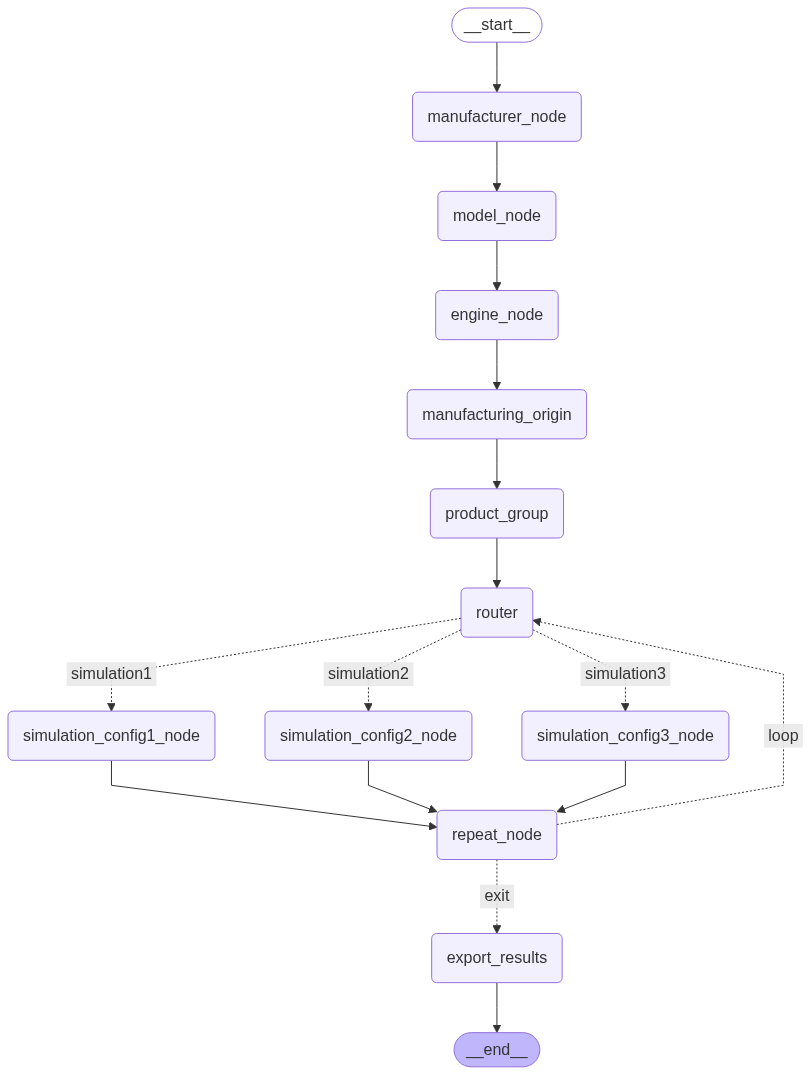

In [124]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))